In [1]:
import sys, os
import imp
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0,'./lib')
import time_analysis_LSST as timean
import timeit
from time_analysis_LSST import (FileManager, MemoryReader, FilterList, Simulation, Sim0404)

In [2]:
path = "/global/cscratch1/sd/cramirez/CoLoRe_LSST/"

In [3]:
filt = {
    "status" : ["done"],
    "template": ["master_with_shear"],
    "factor" : [0.1]
}

sims= {}
for i,sim in enumerate(FileManager.get_simulations(path,filt)):
    simname = i
    sims[simname] = Sim0404(sim,simname)
    print(f'Id: { simname }\tLocation: { sims[simname].location }')

Id: 0	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/New/shear_20/nside_512/0.1/20200521010157
Id: 1	Location: /global/cscratch1/sd/cramirez/CoLoRe_LSST/Old/shear_5/nside_512/0.1/202004150835


In [4]:
x = sims[0]
y = sims[1]

In [5]:
x.set_shear_reader()
y.set_shear_reader()
srx = x.shear_reader
sry = y.shear_reader

In [6]:
xshear = srx.get_values('mp_e1', source=2)
yshear = sry.get_values('mp_e1', source=2)

In [7]:
xshear

array([-0.00339203,  0.00660518, -0.00108561, ...,  0.00398858,
       -0.00059953,  0.00803233])

In [8]:
yshear

array([-0.00287109,  0.00645723, -0.00106647, ...,  0.00387812,
       -0.00084866,  0.00757581])

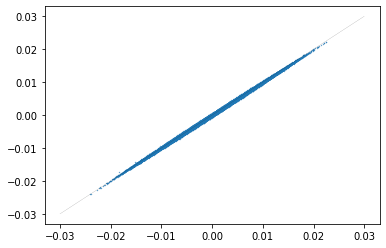

In [12]:
plt.scatter(xshear, yshear, s=0.1)
x = np.linspace(-0.03,0.03,100)
y = x
plt.plot(x,y,'-k', lw=0.1)